In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

100%|██████████| 100/100 [00:18<00:00,  5.45it/s]


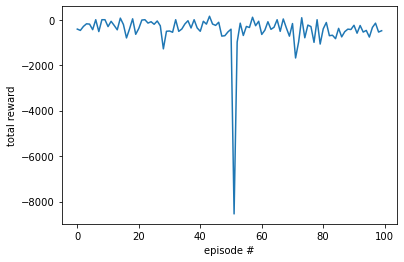

In [1]:
"""
Testing RL agent which randomly chooses actions
"""
import sys
sys.path.append('../')
from typing import List
import numpy as np
import os
import pandas as pd
import gym
from envs.battery_storage import BatteryStorageEnv
from tqdm import tqdm
import matplotlib.pyplot as plt

env = BatteryStorageEnv()

episodes = 100

rewards_lst = []

for i in tqdm(range(episodes)):
    ob = env.reset()
    done = False
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)

    while not done:
        # random action as policy
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        rewards[env.count - 1] = reward
    rewards_lst.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.plot(list(range(episodes)), rewards_lst)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()

100%|██████████| 100/100 [00:17<00:00,  5.69it/s]


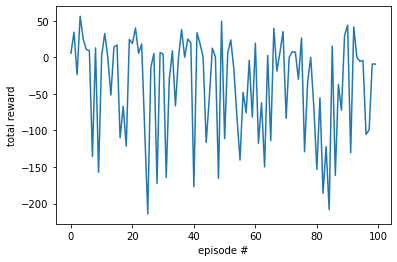

In [2]:
"""
Testing RL agent which chooses charging versus discharging based on the current price
in relation to the running average price.
"""
import sys
sys.path.append('../')
from typing import List
import numpy as np
import os
import pandas as pd
import gym
from envs.battery_storage import BatteryStorageEnv
from tqdm import tqdm
import matplotlib.pyplot as plt

env = BatteryStorageEnv()

episodes = 100

rewards_lst = []

for i in tqdm(range(episodes)):
    ob = env.reset(options = {'reward': 1})
    done = False
    start = True
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)
    avg = np.zeros(1)

    while not done:
        if start:
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)
            avg = info
            start = False
        else:
            if env.curr_price >= avg:
                action = np.random.uniform(env.action_space.low, 0.0)
            else:
                action = np.random.uniform(0.0, env.action_space.high)
            state, reward, done, info = env.step(action)
            avg = info

        rewards[env.count - 1] = reward
    rewards_lst.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.plot(list(range(episodes)), rewards_lst)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()